In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
x_train (50000, 32, 32, 3)
x_test (10000, 32, 32, 3)
y_train (50000, 1)
y_test (10000, 1)


In [3]:
y_train = y_train.reshape(-1,)

In [4]:
y_train = y_train.ravel()
y_test = y_test.ravel()
def show_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Input layer with shape (32, 32, 3)
    layers.Dense(3000, activation='relu'),   # Hidden layer with 3000 neurons and ReLU activation
    layers.Dense(1500, activation='relu'),   # Hidden layer with 1500 neurons and ReLU activation
    layers.Dense(750, activation='relu'),    # Hidden layer with 750 neurons and ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with 10 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer with 32 filters and ReLU activation
    layers.MaxPooling2D((2, 2)),  # Max pooling layer with pool size (2, 2)
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and ReLU activation
    #layers.MaxPooling2D((2, 2)),  # Max pooling layer with pool size (2, 2)
    #layers.Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and ReLU activation
    layers.Flatten(),  # Flatten layer
    layers.Dense(3000, activation='relu'),   # Hidden layer with 3000 neurons and ReLU activation
    layers.Dense(1500, activation='relu'),   # Hidden layer with 1500 neurons and ReLU activation
    #layers.Dense(750, activation='relu'),    # Hidden layer with 750 neurons and ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with 10 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 3000)              32451000  
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                        

In [6]:
predictions = model.predict(x_test)
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

for i in range(10):
    print("Predicted label:", predicted_labels[i])
    print("True label:", y_test[i])
    print()

313/313 [==============================] - 1s 4ms/step
Predicted label: 3
True label: 3

Predicted label: 8
True label: 8

Predicted label: 8
True label: 8

Predicted label: 0
True label: 0

Predicted label: 6
True label: 6

Predicted label: 6
True label: 6

Predicted label: 5
True label: 1

Predicted label: 6
True label: 6

Predicted label: 3
True label: 3

Predicted label: 1
True label: 1



In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 4ms/step - loss: 1.4511 - accuracy: 0.6963
Test Loss: 1.4511029720306396
Test Accuracy: 0.6963000297546387


In [8]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (50000, 32, 32, 3)
x_test (10000, 32, 32, 3)
y_train (50000, 1)
y_test (10000, 1)


In [10]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

1563/1563 [==============================] - 6s 4ms/step - loss: 219.6078 - accuracy: 0.6747
Train Loss: 219.6078338623047
Train Accuracy: 0.6746799945831299


#RNN - Sequence Modelling
 - translate
 - auto complete
 - sent analysis
 previous Neuron's output
 In summary, RNNs are preferred over ANNs when dealing with sequential data because of their ability to capture temporal dependencies and maintain memory over time steps.

**Temporal Sequences:** RNNs are specifically designed to work with sequential data where the order of inputs matters, such as time series data, natural language, audio, etc. ANNs, on the other hand, do not inherently consider the sequential nature of data and are typically used for tasks like classification, regression, and pattern recognition on static data.

**Handling Sequential Information:** RNNs have a feedback loop that allows them to maintain a kind of "memory" or internal state, which makes them suitable for tasks that require remembering past information to process current inputs effectively. ANNs lack this ability to retain information across time steps, which limits their effectiveness in tasks with sequential dependencies.

**Architecture:** While ANNs consist of input, hidden, and output layers, with connections between them that transmit information forward only, RNNs have connections that allow information to flow in both directions, through time. This recurrent connection is what enables RNNs to maintain memory over time steps.

**Applications:** RNNs are commonly used in tasks like sequence generation, machine translation, sentiment analysis, speech recognition, and more, where the temporal aspect of data is crucial. ANNs are more commonly applied to tasks like image recognition, fraud detection, and other tasks where the order of input data is less important.

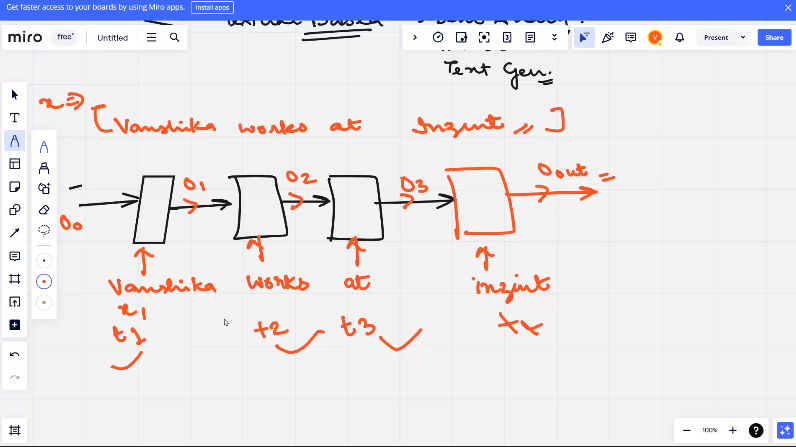

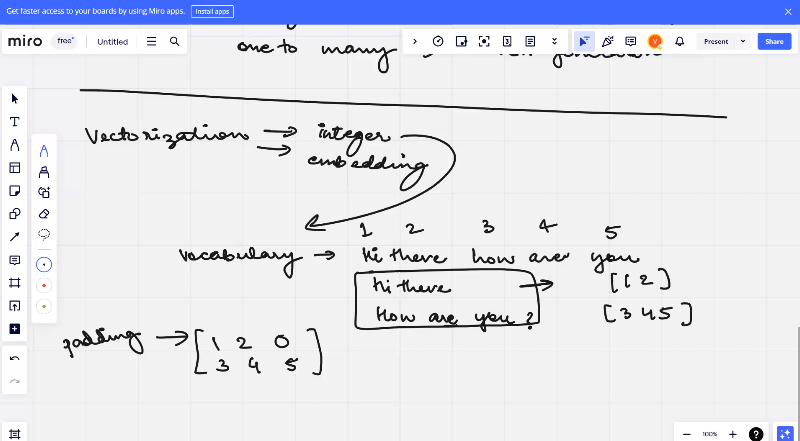

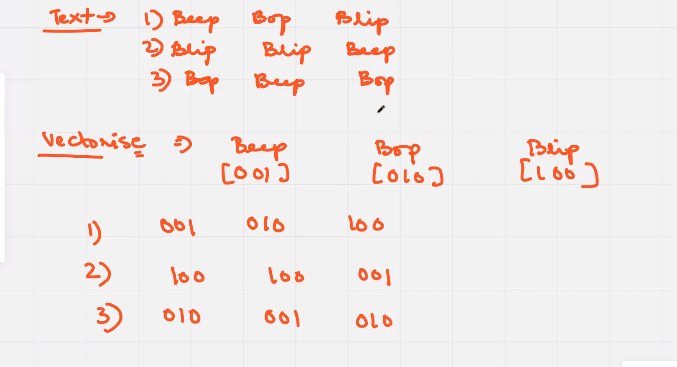

**back propogation**
- vectors m ek target var bhi lena hai
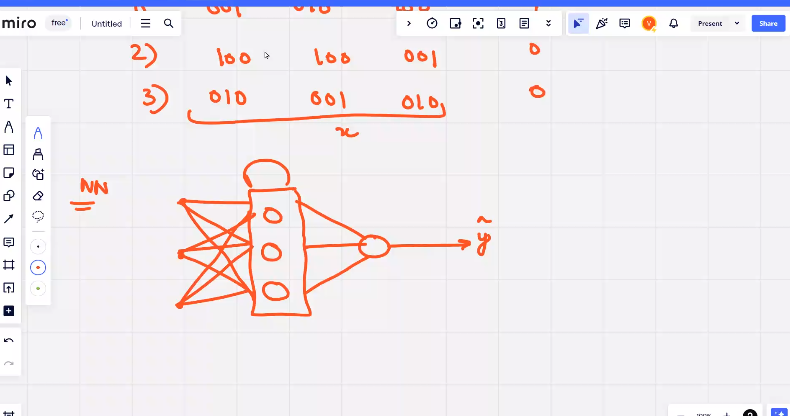

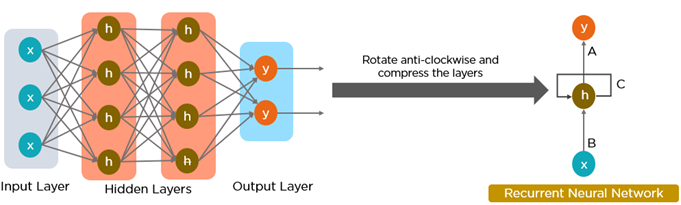

In [1]:
data = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [2]:
from keras.preprocessing.text import Tokenizer
tokenize = Tokenizer()

In [7]:
tokenize.fit_on_texts(data)
print("Word Index:")
print(tokenize.word_index)

Word Index:
{'india': 1, 'jeetega': 2, 'hip': 3, 'ki': 4, 'jai': 5, 'kohli': 6, 'sachin': 7, 'dhoni': 8, 'go': 9, 'hurray': 10, 'bhai': 11, 'bharat': 12, 'mata': 13, 'modi': 14, 'ji': 15, 'inquilab': 16, 'zindabad': 17}


In [9]:
seq = tokenize.texts_to_sequences(data)
print(seq)

[[9, 1], [1, 1], [3, 3, 10], [2, 11, 2, 1, 2], [12, 13, 4, 5], [6, 6], [7, 7], [8, 8], [14, 15, 4, 5], [16, 17]]


In [10]:
from keras.utils import pad_sequences
seq = pad_sequences(seq, padding="post")
print(seq)

[[ 9  1  0  0  0]
 [ 1  1  0  0  0]
 [ 3  3 10  0  0]
 [ 2 11  2  1  2]
 [12 13  4  5  0]
 [ 6  6  0  0  0]
 [ 7  7  0  0  0]
 [ 8  8  0  0  0]
 [14 15  4  5  0]
 [16 17  0  0  0]]


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [15]:

model = Sequential()
model.add(Embedding(17,output_dim = 2, input_length= 5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 2)              34        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = "adam",
            metrics = "accuracy",
            loss = "categorical_crossentropy")

In [17]:
predictions = model.predict(seq)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/embedding/embedding_lookup' defined at (most recent call last):
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\alok\AppData\Local\Temp\ipykernel_19676\3138637661.py", line 1, in <cell line: 1>
      predictions = model.predict(seq)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential/embedding/embedding_lookup'
indices[9,1] = 17 is not in [0, 17)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_predict_function_128]

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the IMDb dataset
vocab_size = 10000  # Vocabulary size, i.e., the top 10,000 most frequent words
max_len = 100  # Maximum sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the data: pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))
model.add(SimpleRNN(units=32))  # SimpleRNN layer with 32 units
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)